In [10]:
%config InlineBackend.figure_formats = ['svg']
import pandas as pd
import seaborn as sns
from glob import glob
sns.set_theme(style="ticks", font="Linux Biolinum O", font_scale=1.2)

frames = [pd.read_csv(data) for data in glob('../churn-repair_*.csv')]
data = pd.concat(frames, ignore_index=True)

def classify(r):
    if r['chunk_n'] == 1:
        return "Kademlia"
    else:
        cache = int(r['cache_sec']) // 3600
        return f"Entropy-{cache}"

data['Protocol'] = data.apply(classify, axis=1)
data = data[data['churn_rate'] >= 1.]
data

,churn_rate,node_count,duration,faulty_rate,object_count,chunk_n,chunk_k,fragment_n,fragment_k,cache_sec,targeted_count,data_lost,targeted,repair,Protocol
30,1.0,100000,10,0,1,1,1,625,200,4294967295,0,0,0,31.025000,Kademlia
31,1.0,100000,10,0,1,1,1,625,200,4294967295,0,0,0,30.895000,Kademlia
32,1.0,100000,10,0,1,1,1,625,200,4294967295,0,0,0,30.970000,Kademlia
33,1.0,100000,10,0,1,1,1,625,200,4294967295,0,0,0,31.490000,Kademlia
34,1.0,100000,10,0,1,1,1,625,200,4294967295,0,0,0,31.020000,Kademlia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,8.0,100000,10,0,1,100,80,500,200,86400,0,0,0,250.901125,Entropy-24
536,6.0,100000,10,0,1,100,80,500,200,172800,0,0,0,187.448625,Entropy-48
537,6.0,100000,10,0,1,100,80,500,200,172800,0,0,0,187.558438,Entropy-48
538,5.0,100000,10,0,1,100,80,500,200,21600,0,0,0,5747.347312,Entropy-6


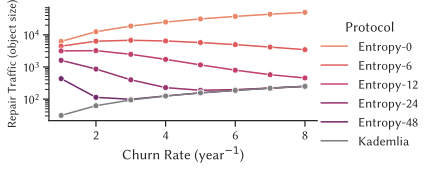

In [18]:
palette = sns.color_palette('flare', n_colors=5)
sns.relplot(data=data, 
    kind="line",
    x="churn_rate", y="repair", hue="Protocol", 
    hue_order=["Entropy-0", "Entropy-6", "Entropy-12", "Entropy-24", "Entropy-48", "Kademlia"],
    marker="o", palette=[*palette, 'gray'],
    height=2.56, aspect=2.) \
.set_xlabels("Churn Rate (year$^{-1}$)") \
.set_ylabels("Repair Traffic (object size)", fontdict={"size": "small"}) \
.set(yscale="log")